# 확률적 경사 하강법  
---

영업 팀은 매주 7개의 생선 중에서 일부를 무작위로 골라 머신러닝 모델을 학습할 수 있게 훈련 데이터를 제공하고 있음  
수산물을 공급하겠다는 곳이 너무 많은데다가 추가되는 수산물은 아직 샘플을 가지고 있지도 않음  
영업 팀은 새로운 생선이 언제 올지도 모르는 상태이고, 모든 생선이 도착할 때까지 기다릴 수 없어서 어떻게 해야 하는지 고민 중

## 점진적인 학습  
---

혼공머신은 훈련 데이터가 한 번에 준비되는 것이 아니라서 기존의 데이터에 새로운 데이터를 추가하여 모델을 매일매일 다시 훈련하는 방법과 새로운 데이터를 추가할 때 이전 데이터를 삭제하면서 데이터 크기를 유지 방법을 생각함  
근데 지속 가능하는 것도 문제이고 버릴 때 다른 데이터에 없는 중요한 생선 데이터가 포함되어 있다면 큰일  

앞서 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 훈련하면 훈련에 사용한 데이터를 모두 유지할 필요도 없고 앞서 학습한 생선을 까먹을 일도 없을 것이다.
이런 식의 훈련 방식을 **점진적 학습** 또는 온라인 학습  
대표적인 알고리즘은 **확률적 경사 하강법**

### <span style="color:purple"><u>확률적 경사 하강법</u></span>

확률적:무작위,랜덤  
경사:기울기  
하강법: 내려가는 방법   


가장 가파른 길을 찾아 내려오지만 조금씩 내려오는 것이 중요  
이렇게 내려오는 과정이 훈련하는 것  


확률적 경사 하강법:훈련 세트에서 랜덤하게 하나의 샘플을 선택하여 가파른 경사를 내려가고, 또 다른 샘플을 선택해서 내려가고, 이런 식으로 반복  

- 에포크:훈련 세트를 한 번 모두 사용하는 과정  
- 미니배치 경사 하강법:몇 개의 샘플을 선택해서 경사를 내려감  
- 배치 경사 하강법:한 번 경사로를 따라 이동하기 위해 전체 샘플 사용  
  배치(batch) : 모델의 가중치를 한번 업데이트시킬 때 사용되는 샘플들의 묶음, 연산 한 번에 들어가는 데이터의 크기

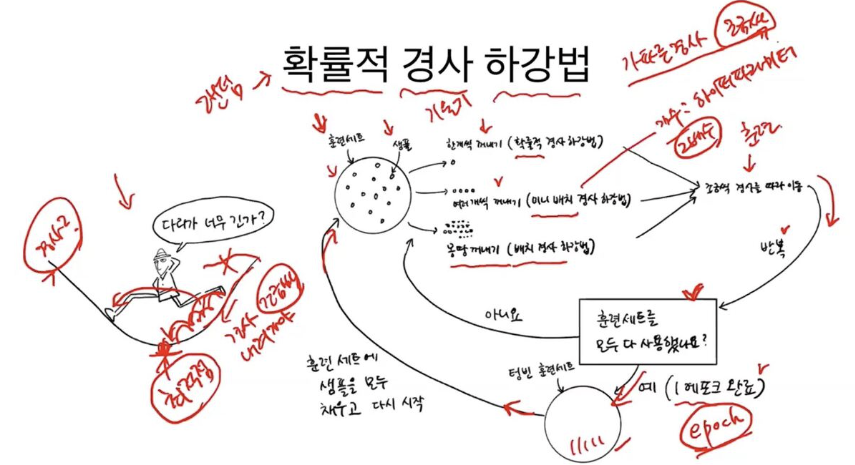

### <span style="color:purple"><u>손실 함수</u></span>

어떤 문제에서 머신 러닝 알고리즘이 얼마나 엉터리인지 측정하는 기준  

### <span style="color:purple"><u>로지스틱 손실 함수</u></span>

타깃이 1일 때 손실은 -log(x), 타깃이 0일 때 -log(1-x)

## SGDClassifier  
---

In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [2]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [5]:
from sklearn.linear_model import SGDClassifier

loss는 손실 함수의 종류 지정  
log가 로지스틱 손실 함수를 의미  
max_iter는 에포크의 횟수를 지정

In [6]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


추가로 훈련을 더 할 때 partial_fit을 사용

In [7]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.825


## 에포크와 과대/과소적합  
---

에포크가 적으면 모델이 훈련을 덜 함

에포크가 많으면 모델이 훈련을 완전하게 끝

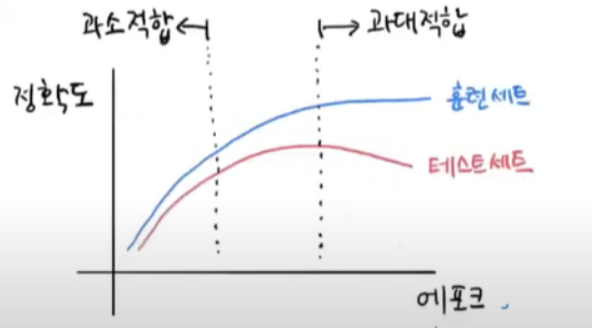

에포크가 진행될수록 훈련 세트는 꾸준히 증가하지만 테스트 세트는 증가하다가 감소한다

이 지점이 과대적합되기 시작하는 곳이다  
과대적합이 일어나기 전에 훈련을 멈추는 것을 **조기 종료**라고 함

In [8]:
import numpy as np

sc = SGDClassifier(loss='log', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [9]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

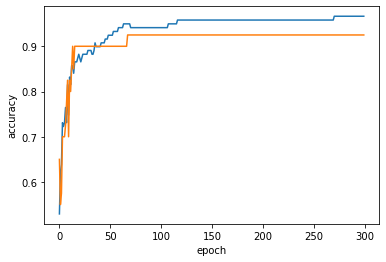

In [10]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [11]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [12]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
